In [18]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from QuickSort import quickSort
from HeapSort import heapSort
from MergeSort import mergeSort
from genData import gen
import numpy as np
import time 

### Preparing Dataset

In [20]:
n = 10
m = 10000
lim = 1e9
dataSet = gen(n, m, lim)

In [21]:
print(dataSet[0])

[-9.99875056e+08 -9.99864800e+08 -9.99354552e+08 ...  9.98823693e+08
  9.98886008e+08  9.98918030e+08]


### QuickSort

In [22]:
quickSortDurations = []

for a in dataSet:
    start = time.perf_counter()
    a = quickSort(a)
    end = time.perf_counter()
    quickSortDurations.append((end - start) * 1000)
    print((end - start) * 1000)
    break

RecursionError: maximum recursion depth exceeded

### HeapSort

In [61]:
heapSortDurations = []

for a in dataSet:
    start = time.perf_counter()
    heapSort(a, m)
    end = time.perf_counter()
    heapSortDurations.append((end - start) * 1000)
    print((end - start) * 1000)

6438.735518999238
6386.220616001083
6316.786487999707
6348.848718000227
6227.062350000779
6789.272199999687


KeyboardInterrupt: 

### MergeSort 

In [63]:
mergeSortDurations = []

for a in dataSet:
    start = time.perf_counter()
    mergeSort(a, 0, m - 1)
    end = time.perf_counter()
    mergeSortDurations.append((end - start) * 1000)
    print((end - start) * 1000)

2779.144936999728
2687.7514329989936
2673.481104999155
2756.9528490002995
2736.9003010007873
3071.1945240000205
3264.0689500003646
3414.1300179999234
3385.3590229991823
3358.2906360006746


### Python Sort (NumPy)

In [62]:
numpySortDurations = []

for a in dataSet:
    start = time.perf_counter()
    a = np.sort(a)
    end = time.perf_counter()
    numpySortDurations.append((end - start) * 1000)

In [ ]:
from docx import Document
from docx.shared import Inches

# 1. Khởi tạo dữ liệu giả lập (Bạn thay bằng dữ liệu thật của bạn)
# Ví dụ 10 dãy
data = {
    "QuickSort": quickSortDurations,  # List 10 phần tử thời gian
    "HeapSort": heapSortDurations,
    "MergeSort": mergeSortDurations,
    "NumPy Sort": numpySortDurations
}

# 2. Tạo file Word
doc = Document()
doc.add_heading('Báo cáo kết quả thử nghiệm', 0)

# 3. Tạo bảng
# Bảng có 11 hàng (1 header + 10 dữ liệu) và 5 cột (STT + 4 thuật toán)
table = doc.add_table(rows=1, cols=5)
table.style = 'Table Grid' # Kẻ khung cho bảng

# Tạo tiêu đề cột
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Dữ liệu'
hdr_cells[1].text = 'QuickSort (ms)'
hdr_cells[2].text = 'HeapSort (ms)'
hdr_cells[3].text = 'MergeSort (ms)'
hdr_cells[4].text = 'NumPy Sort (ms)'

# Điền dữ liệu
for i in range(10):
    row_cells = table.add_row().cells
    row_cells[0].text = str(i + 1) # Cột STT
    row_cells[1].text = f"{data['QuickSort'][i]:.2f}"
    row_cells[2].text = f"{data['HeapSort'][i]:.2f}"
    row_cells[3].text = f"{data['MergeSort'][i]:.2f}"
    row_cells[4].text = f"{data['NumPy Sort'][i]:.2f}"

# Tính trung bình (Hàng cuối cùng)
avg_row = table.add_row().cells
avg_row[0].text = 'Trung bình'
avg_row[1].text = f"{sum(data['QuickSort'])/10:.2f}"
avg_row[2].text = f"{sum(data['HeapSort'])/10:.2f}"
avg_row[3].text = f"{sum(data['MergeSort'])/10:.2f}"
avg_row[4].text = f"{sum(data['NumPy Sort'])/10:.2f}"

# 4. Lưu file
doc.save('Ket_qua_thu_nghiem.docx')
print("Đã xuất file thành công!")

Đã xuất file thành công!


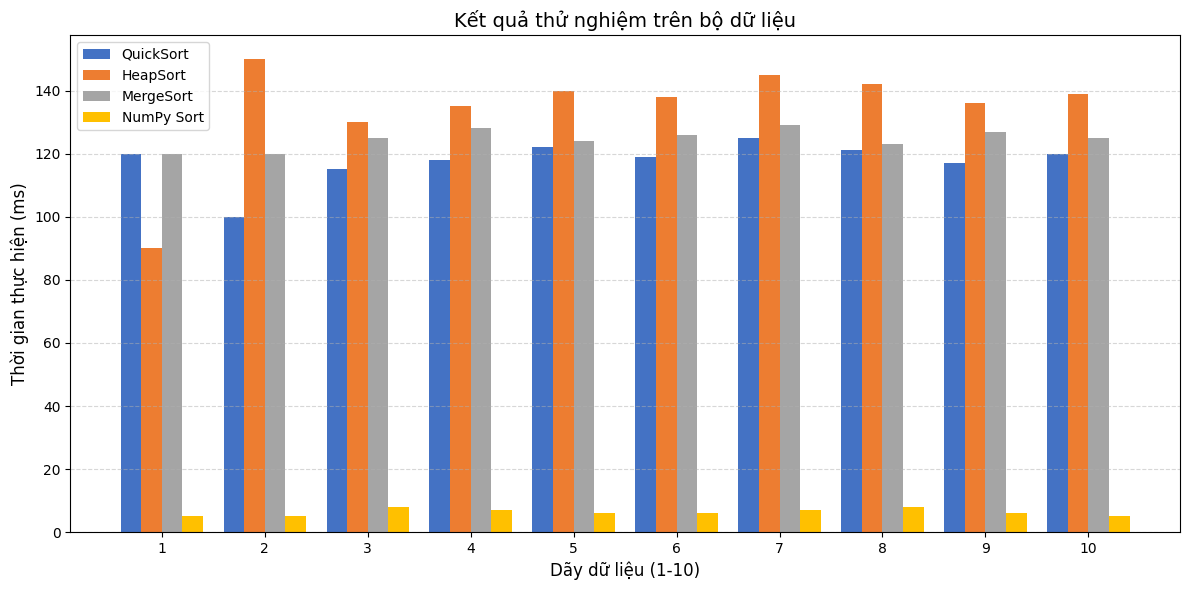

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels = np.arange(1, 11) 
width = 0.2 

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(labels - 1.5*width, quickSortDurations, width, label='QuickSort', color='#4472C4')
rects2 = ax.bar(labels - 0.5*width, heapSortDurations, width, label='HeapSort', color='#ED7D31')
rects3 = ax.bar(labels + 0.5*width, mergeSortDurations, width, label='MergeSort', color='#A5A5A5')
rects4 = ax.bar(labels + 1.5*width, numpySortDurations, width, label='NumPy Sort', color="#71EF71")

# Trang trí biểu đồ
ax.set_xlabel('Dãy dữ liệu (1-10)', fontsize=12)
ax.set_ylabel('Thời gian thực hiện (ms)', fontsize=12)
ax.set_title('Kết quả thử nghiệm trên bộ dữ liệu', fontsize=14)
ax.set_xticks(labels)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Hiển thị
plt.tight_layout()
plt.show()